In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("./Clean/clean-huf-spy.csv")
df = df.drop(columns=['Unnamed: 0'])
df.set_index('Dátum', inplace=True)
df = df[::-1]
annual_risk_free_rate = 0.02
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/252) - 1
benchmark = 'S&P 500'
interesting = ['Citadella_Származtatott_Relative_Return', 'Erste_Stock_Hungary_Indexkövető_Részvény_A_Relative_Return',
               'SP500_Relative_Return', 'HOLD_Nemzetközi_Relative_Return', 'OTP_Supra_Relative_Return', 'HOLD_Columbus_Relative_Return']
# Create a dictionary to rename the columns to something simpler
rename_dict = {
    'Citadella_Származtatott_Relative_Return': 'Citadella',
    'Erste_Stock_Hungary_Indexkövető_Részvény_A_Relative_Return': 'Erste Indexkövető',
    'Generali_Arany_Oroszlán_ESG_Relative_Return': 'Generali ESG',
    'HOLD_Columbus_Relative_Return': 'HOLD Columbus',
    'HOLD_Nemzetközi_Relative_Return': 'HOLD Nemzetközi',
    'HOLD_VM_Abszolút_Származtatott_Befektetési_Relative_Return': 'HOLD Abszolút',
    'MBH_Fejlett_Piaci_Részvény_Relative_Return': 'MBH Fejlett Piaci',
    'OTP_Klímaváltozás_13030_Relative_Return': 'OTP Klímaváltozás',
    'OTP_Supra_Relative_Return': 'OTP Supra',
    'VIG_Opportunity_Fejlett_Piaci_Részvény_Relative_Return': 'VIG Opportunity',
    'SP500_Relative_Return': benchmark
}


# Apply the renaming
df = df.rename(columns=rename_dict)


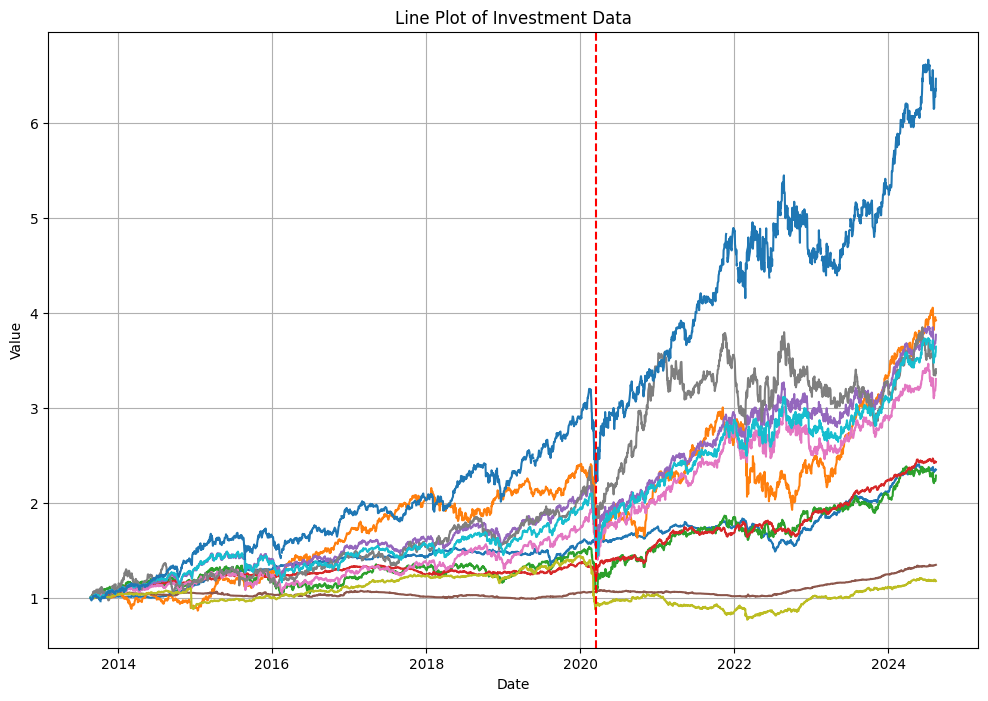

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.axvline(pd.to_datetime('2020-03-16'), color='red', linestyle='--', label='COVID Crash')
plt.title('Line Plot of Investment Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [3]:
# Reversing the order of the data to correct the timeline


# Recalculate Daily Returns after reversing the dataframe
daily_returns = df.pct_change().dropna()

# Recalculate Average Daily Return
average_daily_returns = daily_returns.mean()

# Recalculate Excess Returns
excess_returns = daily_returns - daily_risk_free_rate

# Recompute the Standard Deviation of Daily Returns
std_dev_returns = daily_returns.std()

# Recalculate the Sharpe Ratio
sharpe_ratios_daily = average_daily_returns / std_dev_returns
sharpe_ratios_annualized = sharpe_ratios_daily * np.sqrt(252)

# Recreate the DataFrame for Sharpe Ratios
sharpe_ratios_df = pd.DataFrame({
    'Average Daily Return': average_daily_returns,
    'Standard Deviation of Returns': std_dev_returns,
    'Daily Sharpe Ratio': sharpe_ratios_daily,
    'Annualized Sharpe Ratio': sharpe_ratios_annualized
})

# tools.display_dataframe_to_user(name="Corrected Sharpe Ratios Analysis", dataframe=sharpe_ratios_df)

sharpe_ratios_df



C:\Users\takat\AppData\Local\Temp\ipykernel_3688\480616422.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()


,Average Daily Return,Standard Deviation of Returns,Daily Sharpe Ratio,Annualized Sharpe Ratio
Citadella,0.000319,0.004051,0.078831,1.251406
Erste Indexkövető,0.000572,0.012141,0.047092,0.747560
Generali ESG,0.000353,0.010170,0.034725,0.551248
HOLD Columbus,0.000332,0.004255,0.078089,1.239624
HOLD Nemzetközi,0.000537,0.010341,0.051907,0.823993
HOLD Abszolút,0.000111,0.001933,0.057238,0.908619
MBH Fejlett Piaci,0.000489,0.010378,0.047139,0.748310
OTP Klímaváltozás,0.000528,0.012750,0.041400,0.657206
OTP Supra,0.000089,0.007425,0.011922,0.189256
VIG Opportunity,0.000527,0.010546,0.049941,0.792795


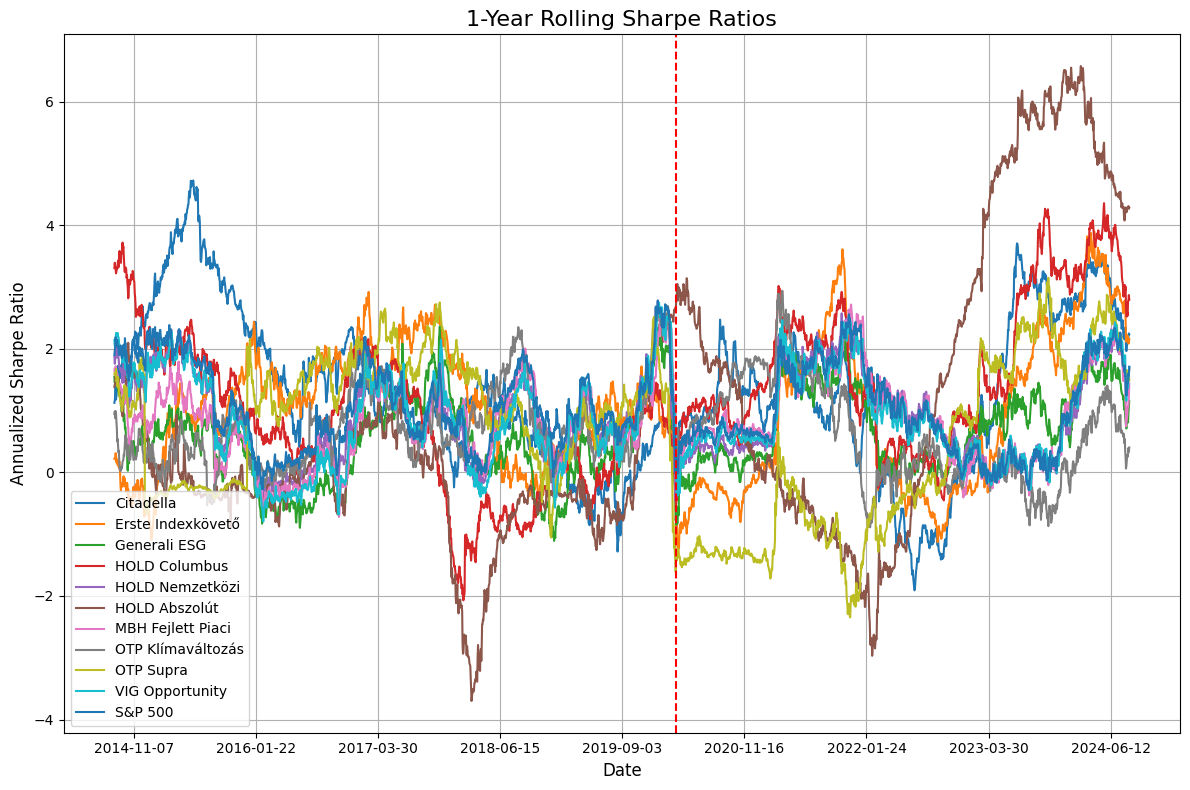

In [4]:
# Define the rolling window period (1 year = 252 trading days)
window_size = 252

# Calculate rolling average daily returns, rolling standard deviation, and rolling Sharpe ratios
rolling_sharpe_ratios = (
    daily_returns.rolling(window=window_size).mean() / 
    daily_returns.rolling(window=window_size).std()
) * np.sqrt(252)
plt.style.use('default')

# Plot the rolling Sharpe Ratios
plt.figure(figsize=(12, 8))
for column in rolling_sharpe_ratios.columns:
    plt.plot(rolling_sharpe_ratios.index, rolling_sharpe_ratios[column], label=column)

plt.title('1-Year Rolling Sharpe Ratios', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Annualized Sharpe Ratio', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust to show roughly one label per year
plt.axvline('2020-03-16', color='red', linestyle='--', label='COVID Crash')
plt.grid(True)
plt.tight_layout()
plt.show()


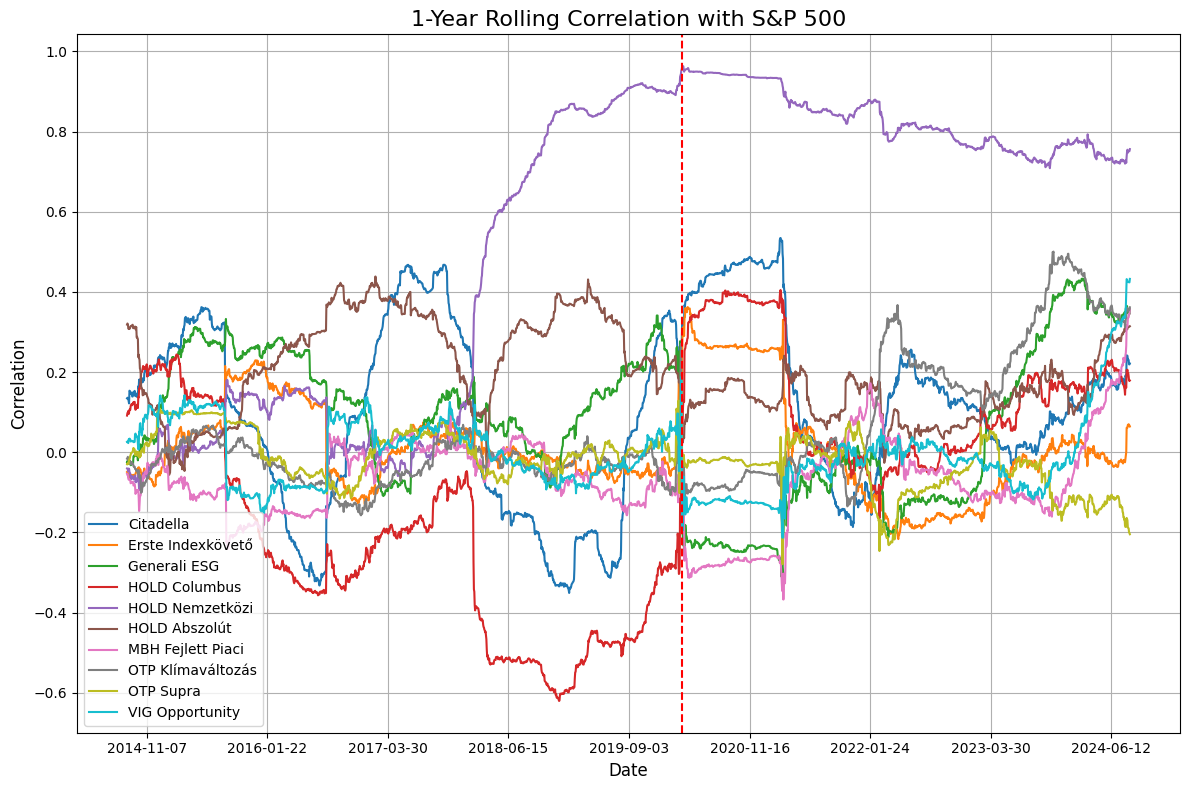

In [5]:
rolling_correlations = daily_returns.rolling(window=window_size).corr(daily_returns[benchmark])
plt.style.use('default')
plt.figure(figsize=(12, 8))
for column in daily_returns.columns:
    if column != benchmark:  
        plt.plot(rolling_correlations.index, rolling_correlations[column], label=column)
plt.title('1-Year Rolling Correlation with S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.axvline('2020-03-16', color='red', linestyle='--', label='COVID Crash')
plt.tight_layout()
plt.show()


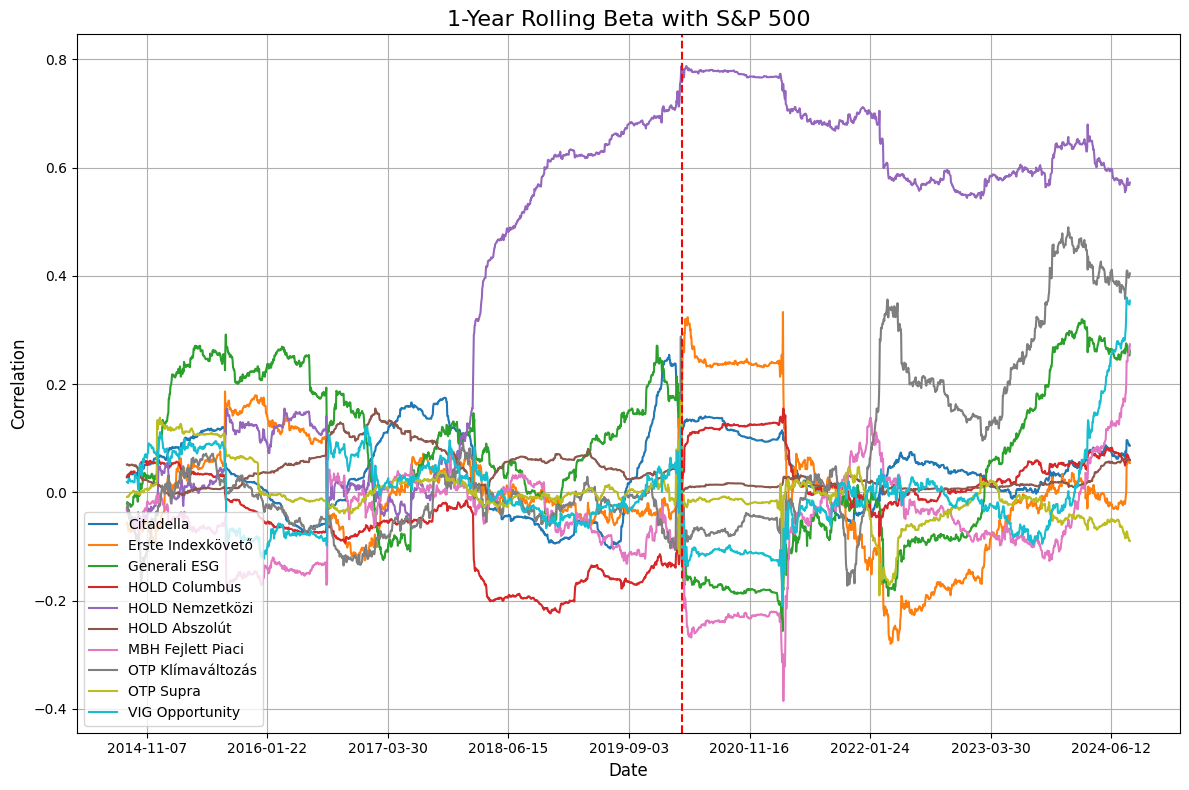

In [6]:
benchmark_returns = daily_returns[benchmark]
window_size = 252
betas = pd.DataFrame(index=daily_returns.index)
for column in daily_returns.columns:
    if column != benchmark:  # Skip the benchmark itself
        rolling_covariance = daily_returns[column].rolling(window=window_size).cov(benchmark_returns)
        rolling_variance = benchmark_returns.rolling(window=window_size).var()
        rolling_beta = rolling_covariance / rolling_variance
        betas[column] = rolling_beta
plt.figure(figsize=(12, 8))
for column in daily_returns.columns:
    if column != benchmark:  
        plt.plot(betas.index, betas[column], label=column)
plt.title('1-Year Rolling Beta with S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.axvline('2020-03-16', color='red', linestyle='--', label='COVID Crash')
plt.tight_layout()
plt.show()



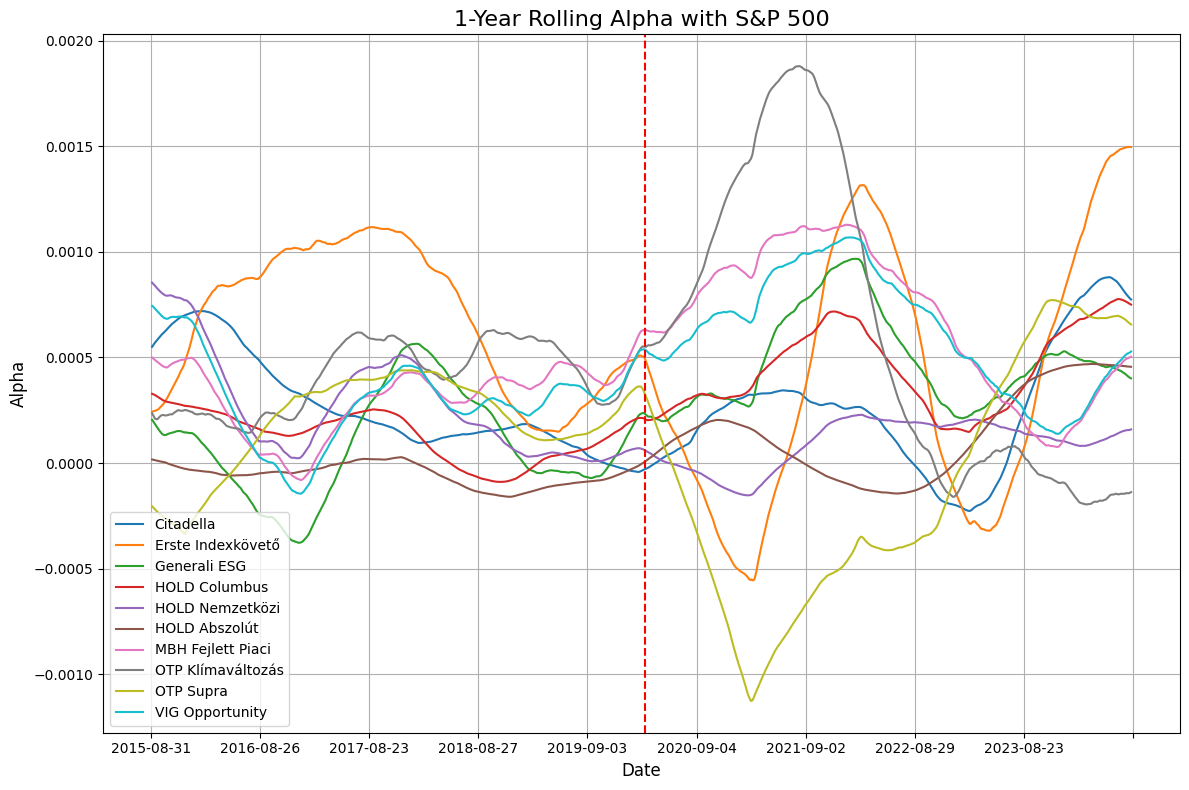

In [7]:
alphas = pd.DataFrame(index=daily_returns.index)

for column in daily_returns.columns:
    if column != benchmark:  # Skip the benchmark itself
        rolling_covariance = daily_returns[column].rolling(window=window_size).cov(benchmark_returns)
        rolling_variance = benchmark_returns.rolling(window=window_size).var()
        rolling_beta = rolling_covariance / rolling_variance
        
        # Calculate the expected return based on CAPM
        expected_returns = rolling_beta * (benchmark_returns.rolling(window=window_size).mean() - daily_risk_free_rate)
        
        # Calculate alpha as the difference between actual and expected returns
        rolling_alpha = daily_returns[column].rolling(window=window_size).mean() - expected_returns
        alphas[column] = rolling_alpha
plt.figure(figsize=(12, 8))
for column in daily_returns.columns:
    if column != benchmark:  
        smoothed_alpha = alphas[column].rolling(window=252).mean()

# Plot the smoothed alpha
        plt.plot(alphas.index, smoothed_alpha, label=column)
        # plt.plot(alphas.index, alphas[column], label=column)
plt.title('1-Year Rolling Alpha with S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Alpha', fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.axvline('2020-03-16', color='red', linestyle='--', label='COVID Crash')
plt.tight_layout()
plt.show()

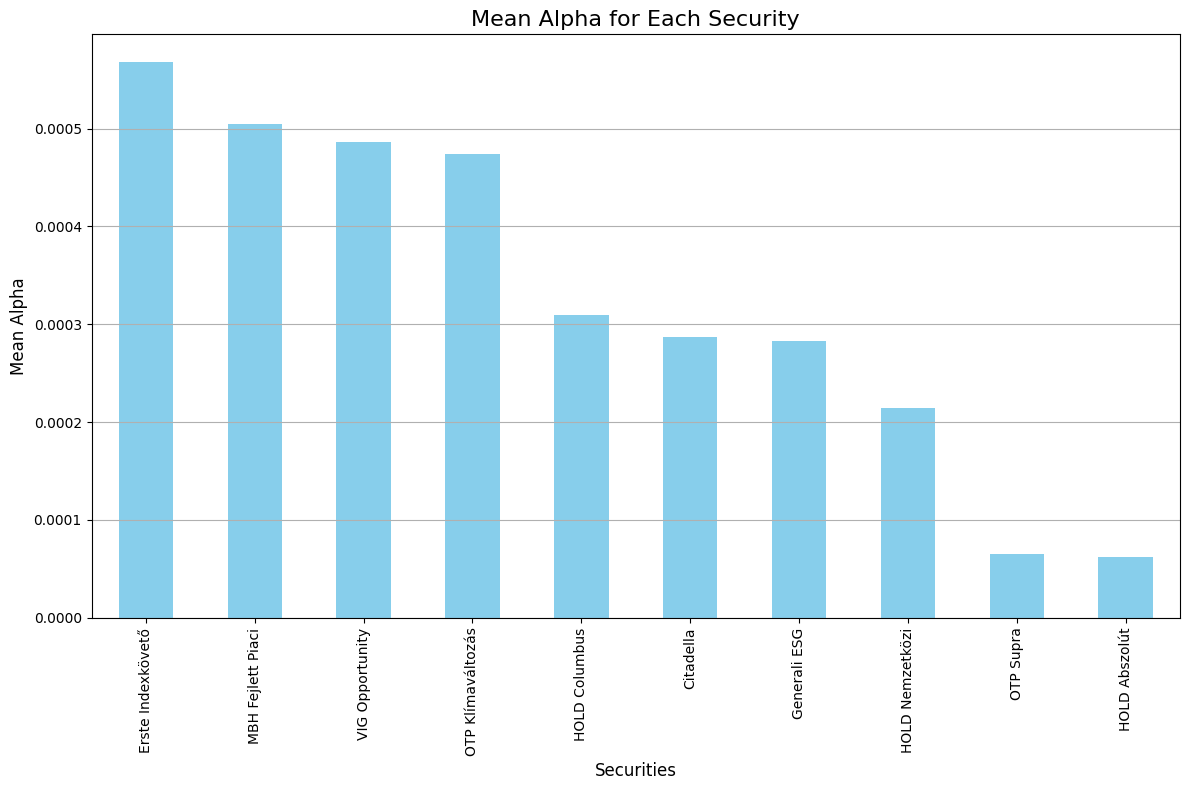

In [8]:
mean_alphas = alphas.mean()
mean_alphas = mean_alphas.sort_values(ascending=False)

# Plot the mean alpha as a bar chart
plt.figure(figsize=(12, 8))
mean_alphas.plot(kind='bar', color='skyblue')
plt.title('Mean Alpha for Each Security', fontsize=16)
plt.xlabel('Securities', fontsize=12)
plt.ylabel('Mean Alpha', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

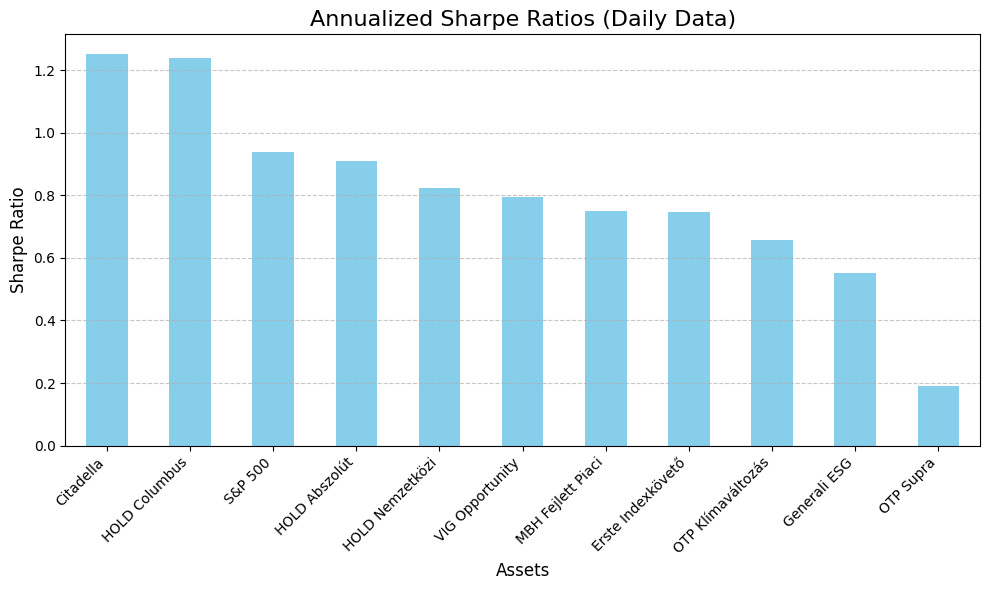

In [9]:
# Sort the Sharpe Ratios in descending order for the bar chart
sorted_sharpe_ratios = sharpe_ratios_df['Annualized Sharpe Ratio'].sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sorted_sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Annualized Sharpe Ratios (Daily Data)', fontsize=16)
plt.xlabel('Assets', fontsize=12)
plt.ylabel('Sharpe Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# It seems the index is not in datetime format. Let's convert it first and then perform the yearly resampling.

# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Now, resample to yearly returns
yearly_returns = df.resample('Y').last().pct_change().dropna()

# Calculate Average Yearly Return
average_yearly_returns = yearly_returns.mean()

# Calculate Standard Deviation of Yearly Returns
std_dev_yearly_returns = yearly_returns.std()

# Calculate the Sharpe Ratio (Yearly)
sharpe_ratios_yearly = (average_yearly_returns - annual_risk_free_rate) / std_dev_yearly_returns

# Create a DataFrame for Yearly Sharpe Ratios
sharpe_ratios_yearly_df = pd.DataFrame({
    'Average Yearly Return': average_yearly_returns,
    'Standard Deviation of Yearly Returns': std_dev_yearly_returns,
    'Yearly Sharpe Ratio': sharpe_ratios_yearly
})

# tools.display_dataframe_to_user(name="Yearly Sharpe Ratios Analysis", dataframe=sharpe_ratios_yearly_df)

sharpe_ratios_yearly_df

C:\Users\takat\AppData\Local\Temp\ipykernel_3688\2356821269.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = df.resample('Y').last().pct_change().dropna()


,Average Yearly Return,Standard Deviation of Yearly Returns,Yearly Sharpe Ratio
Citadella,0.081578,0.074209,0.829799
Erste Indexkövető,0.145602,0.211079,0.595050
Generali ESG,0.071179,0.100445,0.509525
HOLD Columbus,0.079139,0.069536,0.850474
HOLD Nemzetközi,0.126289,0.104518,1.016944
HOLD Abszolút,0.024506,0.055394,0.081342
MBH Fejlett Piaci,0.112915,0.124619,0.745593
OTP Klímaváltozás,0.121925,0.207367,0.491522
OTP Supra,0.023476,0.152273,0.022830
VIG Opportunity,0.123720,0.128671,0.806086


C:\Users\takat\AppData\Local\Temp\ipykernel_3688\1894185665.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  correlation_matrix = df.pct_change().dropna().corr()


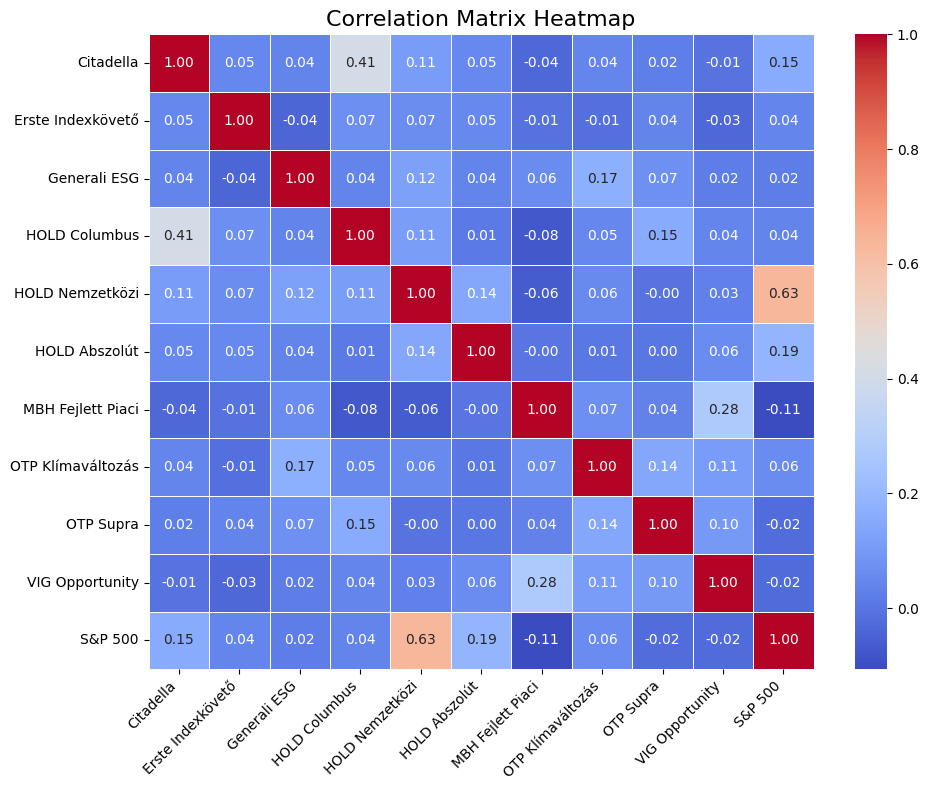

In [11]:
# Calculate the correlation matrix among the returns
correlation_matrix = df.pct_change().dropna().corr()

import seaborn as sns

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()



C:\Users\takat\AppData\Local\Temp\ipykernel_3688\256318133.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df.resample('M').last().pct_change().dropna()


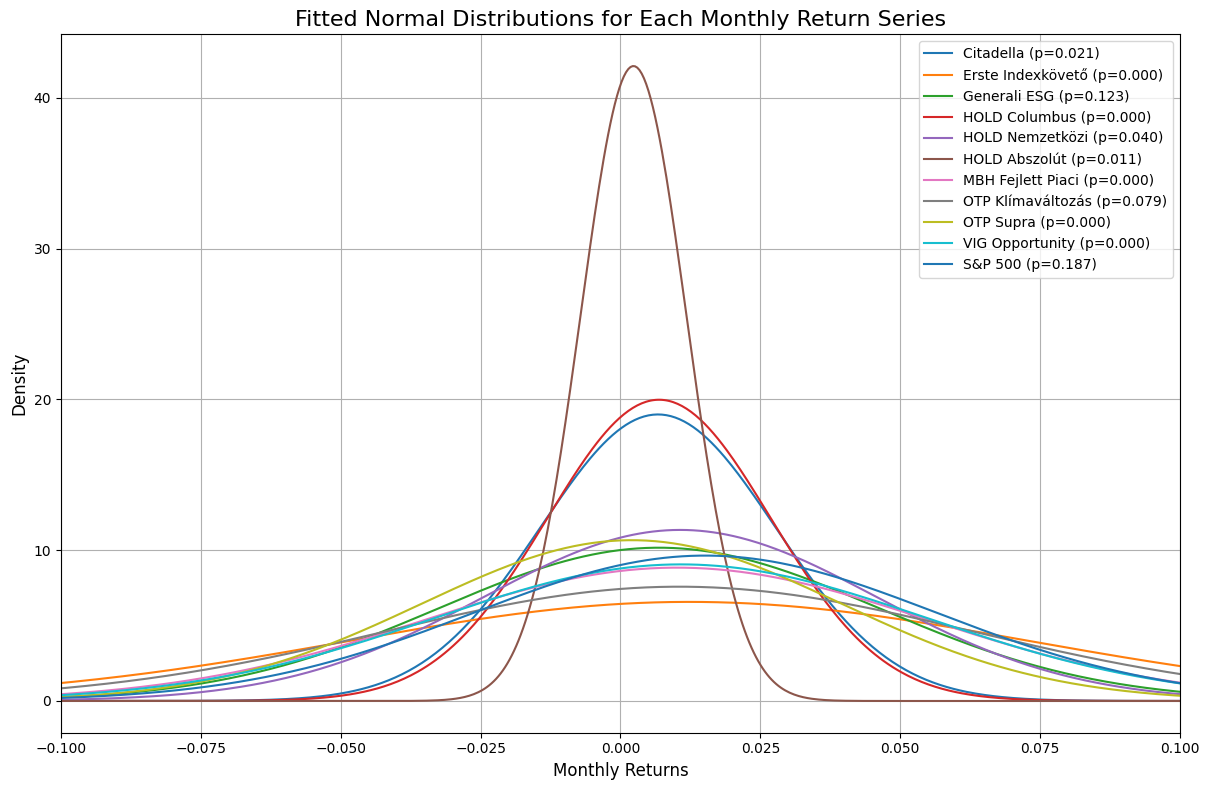

{'Citadella': {'W-statistic': 0.976382851600647,
  'p-value': 0.02115016244351864,
  'is_normal': False},
 'Erste Indexkövető': {'W-statistic': 0.9332784414291382,
  'p-value': 6.234806278371252e-06,
  'is_normal': False},
 'Generali ESG': {'W-statistic': 0.9839526414871216,
  'p-value': 0.12294694036245346,
  'is_normal': True},
 'HOLD Columbus': {'W-statistic': 0.9462484121322632,
  'p-value': 5.1701677875826135e-05,
  'is_normal': False},
 'HOLD Nemzetközi': {'W-statistic': 0.9791489839553833,
  'p-value': 0.040055617690086365,
  'is_normal': False},
 'HOLD Abszolút': {'W-statistic': 0.9735967516899109,
  'p-value': 0.011254475452005863,
  'is_normal': False},
 'MBH Fejlett Piaci': {'W-statistic': 0.8649518489837646,
  'p-value': 1.2846615993211685e-09,
  'is_normal': False},
 'OTP Klímaváltozás': {'W-statistic': 0.9820507168769836,
  'p-value': 0.07888635993003845,
  'is_normal': True},
 'OTP Supra': {'W-statistic': 0.6894423961639404,
  'p-value': 2.3975206162144295e-15,
  'is_nor

In [12]:
from scipy.stats import shapiro
from scipy.stats import norm

# Resample the data to monthly frequency and calculate the percentage change (returns)
monthly_returns = df.resample('M').last().pct_change().dropna()

# Initialize dictionary to store Shapiro-Wilk test results
shapiro_test_results_monthly = {}

# Generate x values for plotting
x = np.linspace(-0.2, 0.2, 1000)

# Initialize a plot for the fitted curves
plt.figure(figsize=(12, 8))

# Iterate over each time series in the monthly returns dataframe
for column in monthly_returns.columns:
    try:
        # Extract the monthly returns for the current asset
        returns = monthly_returns[column].dropna()

        # Perform the Shapiro-Wilk test
        W, p_value = shapiro(returns)
        shapiro_test_results_monthly[column] = {
            'W-statistic': W,
            'p-value': p_value,
            'is_normal': p_value > 0.05
        }

        # Fit a normal distribution to the returns for plotting
        mu, std = norm.fit(returns)
        fitted_curve = norm.pdf(x, mu, std)
        plt.plot(x, fitted_curve, label=f"{column} (p={p_value:.3f})")
    except Exception as e:
        shapiro_test_results_monthly[column] = {
            'W-statistic': None,
            'p-value': None,
            'is_normal': False,
            'error': str(e)
        }

# Draw the graph
plt.title('Fitted Normal Distributions for Each Monthly Return Series', fontsize=16)
plt.xlabel('Monthly Returns', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(-0.1,0.1)
plt.show()

shapiro_test_results_monthly



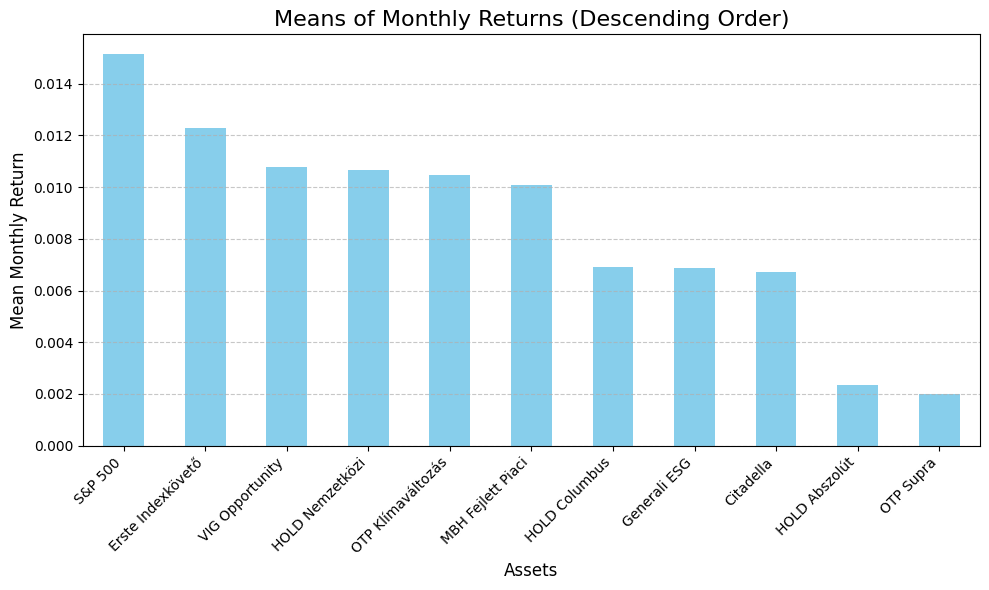

In [13]:
# Calculate the mean of the monthly returns for each time series
monthly_means = monthly_returns.mean()

# Sort the means in descending order for the bar chart
sorted_monthly_means = monthly_means.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sorted_monthly_means.plot(kind='bar', color='skyblue')
plt.title('Means of Monthly Returns (Descending Order)', fontsize=16)
plt.xlabel('Assets', fontsize=12)
plt.ylabel('Mean Monthly Return', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\takat\AppData\Local\Temp\ipykernel_3688\1465243133.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return data.pct_change().dropna()


21


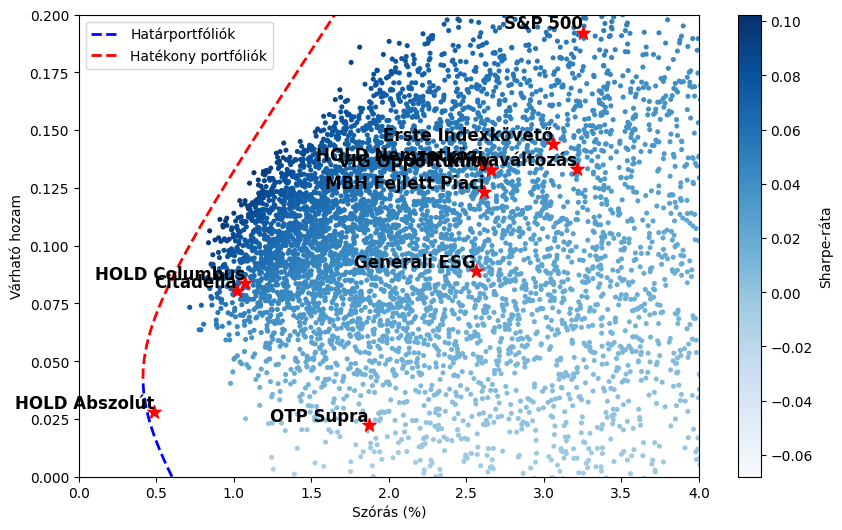

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

# Function to download stock data
def load_yfinance_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Function to calculate daily returns
def calculate_returns(data):
    return data.pct_change().dropna()

# Function to calculate portfolio statistics
def portfolio_statistics(weights, returns, covariance):
    portfolio_return = np.dot(weights, returns.mean()) * 252  # Annualized return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(252)  # Annualized volatility
    return portfolio_return, portfolio_volatility

# Function to calculate the efficient frontier
def efficient_frontier(returns, num_portfolios, risk_free_rate):
    cov_matrix = returns.cov() * 252  # Annualize the covariance matrix
    expected_returns = returns.mean() * 252  # Annualize the returns
    num_assets = len(expected_returns)
    results = np.zeros((4, num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.randn(num_assets)*1000
        weights /= np.sum(weights)        
        portfolio_return, portfolio_volatility = portfolio_statistics(weights, returns, cov_matrix)
        results[0,i] = portfolio_volatility
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility  # Sharpe ratio

    return results

# Function to find the minimum variance portfolio
def minimum_variance_portfolio(cov_matrix):
    num_assets = len(cov_matrix)
    args = (cov_matrix,)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(lambda weights, cov: np.dot(weights.T, np.dot(cov, weights)),
                      num_assets * [1. / num_assets,],
                      args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Function to find the market portfolio (highest Sharpe ratio)
def market_portfolio(returns, covariance, risk_free_rate):
    num_assets = len(returns)
    args = (returns, covariance, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(lambda weights, returns, cov, rf: -(np.dot(weights, returns) - rf) / np.sqrt(np.dot(weights.T, np.dot(cov, weights))),
                      num_assets * [1. / num_assets,],
                      args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Plotting function for the efficient frontier
def plot_efficient_frontier(results, exact_frontier_returns, exact_frontier_volatilities, 
                            mvp_return, mvp_volatility, market_return, market_volatility, 
                            risk_free_rate, min_x, max_x, min_y, max_y,returns, tickers):
    plt.figure(figsize=(10, 6))

    # Set the same limits as in Manim
    plt.xlim(min_x, max_x )  # Volatility range
    plt.ylim(min_y, max_y )  # Expected return range

    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='Blues', marker='o', s=7, alpha=1)
    plt.colorbar(label='Sharpe-ráta')

    # Line plot for the exact efficient frontier
    min_vol =  np.array(exact_frontier_volatilities).min()
    min_vol_pos = np.where(np.array(exact_frontier_volatilities) == min_vol)[0][0]
    print(min_vol_pos)
    plt.plot(exact_frontier_volatilities[:min_vol_pos], exact_frontier_returns[:min_vol_pos], 'b--', label='Határportfóliók', linewidth=2)
    
    plt.plot(exact_frontier_volatilities[min_vol_pos:], exact_frontier_returns[min_vol_pos:], 'r--', label='Hatékony portfóliók', linewidth=2)
    for tick in tickers:
       
        plt.scatter(np.sqrt(returns[tick].var())* 252, returns[tick].mean()* 252, color='red', marker='*', s=100, zorder=2, )
        plt.text(np.sqrt(returns[tick].var())* 252, returns[tick].mean()* 252, tick, fontsize=12, fontweight="bold", verticalalignment='bottom', horizontalalignment='right', color='black')

    # plt.title('Hatékony határvonal és tőkepiaci vonal')
    plt.xlabel('Szórás (%)')
    plt.ylabel('Várható hozam')
    plt.legend()
    # plt.show()

# Loading data
risk_free_rate=0.02
num_portfolios=10000
min_x, max_x = 0, 4
min_y, max_y = 0.0, 0.2
tickers = df.columns
returns = calculate_returns(df)

# Simulated efficient frontier
results = efficient_frontier(returns, num_portfolios, risk_free_rate)

# Exact efficient frontier calculations (refactored from the previous code)

mu = returns.mean() * 252  # Annualize the daily returns
Sigma = returns.cov() * 252  # Annualize the daily covariances
Sigma_inv = np.linalg.inv(Sigma)
ones = np.ones(len(mu))
U = np.vstack([mu, ones]).T
M = U.T@ (Sigma_inv@ U)
M_inv = np.linalg.inv(M)
desired_returns = np.linspace(min_y, max_y , 100)  # Adjusted to match Manim
exact_weights_list = []
exact_risk_list = []

for desired_return in desired_returns:
    u = np.array([desired_return, 1])
    w_star = Sigma_inv@ U@ M_inv@u
    # print(w_star)
    portfolio_risk = np.sqrt(np.dot(w_star.T, np.dot(Sigma, w_star))) * np.sqrt(252)
    exact_weights_list.append(w_star)
    exact_risk_list.append(portfolio_risk)

# Find the minimum variance portfolio
mvp_weights = minimum_variance_portfolio(Sigma)
mvp_return, mvp_volatility = portfolio_statistics(mvp_weights, returns, Sigma)

# Find the market portfolio
market_weights = market_portfolio(mu, Sigma, risk_free_rate)
market_return, market_volatility = portfolio_statistics(market_weights, returns, Sigma)

# Plot both the simulated and exact efficient frontiers
plot_efficient_frontier(results, desired_returns, exact_risk_list, mvp_return, mvp_volatility, market_return, market_volatility, risk_free_rate, min_x, max_x, min_y, max_y, returns, tickers)

plt.show()
